In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

In [3]:
spn_data = pd.read_csv(r'spn.csv')

In [4]:
survey = spn_data.loc[:, spn_data.columns.notnull()]

In [5]:
i = 0
for column in survey.columns:
    if(i != 0):
        col_name = str(column)
        num = re.findall(r'\d+', str(col_name))[0]
        if(int(num)<=9):
            survey.rename(columns = {col_name:f'demographic_{column}'}, inplace = True)
        if((int(num)>=10) and (int(num)<=17)):
            survey.rename(columns = {col_name:f'dbnh_{column}'}, inplace = True)
        if((int(num)>=18) and (int(num)<=26)):
            survey.rename(columns = {col_name:f'dbh_{column}'}, inplace = True)
        if((int(num)>=27) and (int(num)<=38)):
            survey.rename(columns = {col_name:f'dbg_{column}'}, inplace = True)
        if((int(num)>=39) and (int(num)<=45)):
            survey.rename(columns = {col_name:f'ait_{column}'}, inplace = True)
        if((int(num)>=46) and (int(num)<=51)):
            survey.rename(columns = {col_name:f'ainh_{column}'}, inplace = True)
        if((int(num)>=52) and (int(num)<=57)):
            survey.rename(columns = {col_name:f'aih_{column}'}, inplace = True)
    i = i+1
print(survey.columns)

Index(['Timestamp', 'demographic_1. ¿En qué país reside actualmente?',
       'demographic_2. ¿En qué país has conducido más?',
       'demographic_3. ¿Cuál es tu edad?',
       'demographic_4. ¿Cuál es su género?',
       'demographic_5. ¿Cuál es su origen étnico/raza?',
       'demographic_6. ¿Cuál es tu educación?',
       'demographic_7. ¿Cuál es tu situacion laboral?',
       'demographic_8. ¿Cuál es su rango de ingresos?',
       'demographic_9. Cuál es tu estado civil',
       'dbnh_10. ¿Cuál describe mejor su comportamiento de conducción la mayor parte del tiempo en términos de velocidad mientras conduce en: CARRETERAS NO AUTOPISTAS',
       'dbnh_11. ¿Cuál describe mejor su comportamiento la mayor parte del tiempo cuando se trata de señalar cambios de carril mientras conduce en: CARRETERAS NO AUTOPISTAS',
       'dbnh_12. Cuál describe mejor su comportamiento de cambio de carril cuando conduce en: CARRETERAS NO AUTOPISTAS',
       'dbnh_13. Si desea cambiar de carril en una ca

In [6]:
for column in survey.columns:
        if(str.startswith(column, 'dbnh')):
            print(f'\'{column}\',')

'dbnh_10. ¿Cuál describe mejor su comportamiento de conducción la mayor parte del tiempo en términos de velocidad mientras conduce en: CARRETERAS NO AUTOPISTAS',
'dbnh_11. ¿Cuál describe mejor su comportamiento la mayor parte del tiempo cuando se trata de señalar cambios de carril mientras conduce en: CARRETERAS NO AUTOPISTAS',
'dbnh_12. Cuál describe mejor su comportamiento de cambio de carril cuando conduce en: CARRETERAS NO AUTOPISTAS',
'dbnh_13. Si desea cambiar de carril en una carretera que NO ES AUTOPISTA y pasar a un carril que está a 2 o más carriles de distancia',
'dbnh_14. ¿Cómo describiría la forma en que acelera y desacelera mientras conduce en: CARRETERAS QUE NO SON AUTOPISTAS?',
'dbnh_15. ¿Con qué frecuencia adelanta a otros vehículos cuando conduce en: CARRETERAS QUE NO SON AUTOPISTAS?',
'dbnh_16. ¿Qué distancia suele mantener del coche que le precede cuando circula por: CARRETERAS QUE NO SON AUTOPISTAS?',
'dbnh_17. Cuál describe mejor su comportamiento de frenado cuand

In [7]:
dbnh_values = survey[['dbnh_10. ¿Cuál describe mejor su comportamiento de conducción la mayor parte del tiempo en términos de velocidad mientras conduce en: CARRETERAS NO AUTOPISTAS',
'dbnh_11. ¿Cuál describe mejor su comportamiento la mayor parte del tiempo cuando se trata de señalar cambios de carril mientras conduce en: CARRETERAS NO AUTOPISTAS',
'dbnh_12. Cuál describe mejor su comportamiento de cambio de carril cuando conduce en: CARRETERAS NO AUTOPISTAS',
'dbnh_13. Si desea cambiar de carril en una carretera que NO ES AUTOPISTA y pasar a un carril que está a 2 o más carriles de distancia',
'dbnh_14. ¿Cómo describiría la forma en que acelera y desacelera mientras conduce en: CARRETERAS QUE NO SON AUTOPISTAS?',
'dbnh_15. ¿Con qué frecuencia adelanta a otros vehículos cuando conduce en: CARRETERAS QUE NO SON AUTOPISTAS?',
'dbnh_16. ¿Qué distancia suele mantener del coche que le precede cuando circula por: CARRETERAS QUE NO SON AUTOPISTAS?',
'dbnh_17. Cuál describe mejor su comportamiento de frenado cuando conduce en: CARRETERAS QUE NO SON AUTOPISTAS?']]

In [8]:
dbnh_values.iloc[:,0].unique()
dbnh_0_key = { 'Normalmente conduzco por debajo del límite de velocidad (más de 10 km/h POR DEBAJO del límite de velocidad).': 0,
               'Normalmente conduzco al límite de velocidad (dentro de más o menos 10 km/h).': 1,
               'Normalmente conduzco por encima del límite de velocidad (más de 10 km/h POR ENCIMA del límite de velocidad).': .5
}
dbnh_values.iloc[:,0].replace(dbnh_0_key, inplace = True)

In [9]:
dbnh_values.iloc[:,1].unique()
dbnh_1_key = { 'Señalo CADA movimiento (Usas tu señal el 100% del tiempo)': 0,
                'A veces señalo un movimiento: (Usas tu señal el 50% del tiempo)': .75,
                'Señalo mis movimientos a menudo (Usas tu señal el 75% del tiempo)': .25,
                'Raramente señalo un movimiento: (Usas tu señal el 25% del tiempo o menos)':1
}
dbnh_values.iloc[:,1].replace(dbnh_1_key, inplace = True)

In [10]:
dbnh_values.iloc[:,2].unique()
dbnh_2_key = { 'Cambio de carril sólo si es necesario.': 0,
                'De vez en cuando cambio de carril para adelantar a un vehículo extremadamente lento.': .5,
                'Cambio de carril con frecuencia para estar en el carril más rápido posible.': 1
}
dbnh_values.iloc[:,2].replace(dbnh_2_key, inplace = True)

In [11]:
dbnh_3_key = { 'Usted planifica con anticipación y cambia de carril de a un carril a la vez cuando ve una apertura. Rara vez cambia varios carriles a la vez.': 0,
                'A veces, cambia varios carriles a la vez y, a veces, planifica con anticipación y cambia de carril uno a la vez.': .5,
                'Con frecuencia cambia todos los carriles a la vez. (Esto podría significar cambiar 2 o más carriles a la vez)': 1
}
dbnh_values.iloc[:,3].replace(dbnh_3_key, inplace = True)

In [12]:
dbnh_4_key = {'Por lo general, acelera y desacelera lentamente y le lleva un tiempo ponerse al día. Te evitas tener que hacer una pequeña parada.': 0,
            'Por lo general, acelera y desacelera a un ritmo moderado y alcanza la velocidad relativamente rápido. Rara vez se detiene en seco y los pasajeros no se sienten sacudidos hacia adelante o hacia atrás cuando conduce.':.5,
            'Por lo general, acelera y desacelera muy rápidamente y alcanza la velocidad rápidamente, pero es posible que se sienta sacudido hacia adelante o hacia atrás con frecuencia mientras conduce.':1
}
dbnh_values.iloc[:,4].replace(dbnh_4_key, inplace = True)

In [13]:
dbnh_5_key = {'Rara vez (solo paso vehículos cuando es absolutamente necesario)':0,
            'A veces (paso a otros vehículos solo en unas pocas situaciones)':.25,
            'A menudo (paso a otros vehículos en una variedad de situaciones diferentes)':.75,
            'Siempre (No importa la situación, paso vehículos cada vez que tengo la oportunidad)':1
}
dbnh_values.iloc[:,5].replace(dbnh_5_key, inplace = True)

In [14]:
dbnh_6_key = {'Larga distancia':0,
            'Media Distancia':.5,
            'Distancia Corta':1
}
dbnh_values.iloc[:,6].replace(dbnh_6_key, inplace = True)

In [15]:
dbnh_7_key = {'A veces: freno cuando es necesario, pero trato de mantener la distancia adecuada con los autos que me rodean para no frenar cada vez que el tráfico disminuye.': .5,
            'Raramente: Solo freno si es necesario, por ejemplo cuando hay tráfico o hay vehículos de emergencia. Si puedo evitar frenar cambiando de carril, cambiaré de carril.': 0,
            'Frecuentemente: Cada vez que veo luces de freno, algo en el camino, o cada vez que percibo riesgo, freno.':1    
}
dbnh_values.iloc[:,7].replace(dbnh_7_key, inplace = True)

In [16]:
dbnh_values

,dbnh_10. ¿Cuál describe mejor su comportamiento de conducción la mayor parte del tiempo en términos de velocidad mientras conduce en: CARRETERAS NO AUTOPISTAS,dbnh_11. ¿Cuál describe mejor su comportamiento la mayor parte del tiempo cuando se trata de señalar cambios de carril mientras conduce en: CARRETERAS NO AUTOPISTAS,dbnh_12. Cuál describe mejor su comportamiento de cambio de carril cuando conduce en: CARRETERAS NO AUTOPISTAS,dbnh_13. Si desea cambiar de carril en una carretera que NO ES AUTOPISTA y pasar a un carril que está a 2 o más carriles de distancia,dbnh_14. ¿Cómo describiría la forma en que acelera y desacelera mientras conduce en: CARRETERAS QUE NO SON AUTOPISTAS?,dbnh_15. ¿Con qué frecuencia adelanta a otros vehículos cuando conduce en: CARRETERAS QUE NO SON AUTOPISTAS?,dbnh_16. ¿Qué distancia suele mantener del coche que le precede cuando circula por: CARRETERAS QUE NO SON AUTOPISTAS?,dbnh_17. Cuál describe mejor su comportamiento de frenado cuando conduce en: CARRETERAS QUE NO SON AUTOPISTAS?
0,1.0,0.00,0.0,0.0,0.5,0.75,0.5,1.0
1,1.0,0.00,0.0,0.0,0.5,0.00,0.5,0.5
2,1.0,0.00,1.0,0.0,0.0,0.25,0.5,1.0
3,1.0,0.25,0.0,0.0,0.0,0.25,0.5,0.0
4,0.0,0.25,0.5,0.0,0.5,0.25,0.5,0.5
5,1.0,0.25,0.5,0.0,0.5,0.00,0.5,0.5
6,0.0,0.00,0.0,0.0,0.5,0.00,0.0,1.0
7,1.0,0.00,0.5,0.0,0.5,0.25,0.5,0.5
8,1.0,0.00,0.5,0.0,0.5,0.75,0.5,0.0
9,1.0,0.25,0.5,0.5,0.5,0.75,1.0,0.0


In [17]:
for column in survey.columns:
        if(str.startswith(column, 'dbh')):
            print(f'\'{column}\',')

'dbh_18. ¿Cuál describe mejor su comportamiento de conducción la mayor parte del tiempo en términos de velocidad mientras conduce en: LA AUTOPISTA',
'dbh_19. Cuál describe mejor su comportamiento la mayor parte del tiempo cuando se trata de señalar cambios de carril mientras conduce en: LA AUTOPISTA',
'dbh_20. Cuál describe mejor su comportamiento de cambio de carril cuando conduce en: LA AUTOPISTA',
'dbh_21. Si desea cambiar de carril en la AUTOPISTA y pasar a un carril que está a 2 o más carriles de distancia',
'dbh_22. ¿Cómo describiría la forma en que acelera y desacelera mientras conduce en: LA AUTOPISTA',
'dbh_23. ¿Con qué frecuencia adelanta a otros vehículos cuando conduce en: LA AUTOPISTA',
'dbh_24. ¿Qué distancia suele mantener con el coche de delante cuando circula por: LA AUTOPISTA?',
'dbh_25. Cuál describe mejor su comportamiento de frenado cuando conduce en: LA AUTOPISTA',
'dbh_26. Cuando maneja en una AUTOPISTA con más de 2 carriles, ¿cuál es su preferencia?',


In [18]:
dbh_values = survey[['dbh_18. ¿Cuál describe mejor su comportamiento de conducción la mayor parte del tiempo en términos de velocidad mientras conduce en: LA AUTOPISTA',
'dbh_19. Cuál describe mejor su comportamiento la mayor parte del tiempo cuando se trata de señalar cambios de carril mientras conduce en: LA AUTOPISTA',
'dbh_20. Cuál describe mejor su comportamiento de cambio de carril cuando conduce en: LA AUTOPISTA',
'dbh_21. Si desea cambiar de carril en la AUTOPISTA y pasar a un carril que está a 2 o más carriles de distancia',
'dbh_22. ¿Cómo describiría la forma en que acelera y desacelera mientras conduce en: LA AUTOPISTA',
'dbh_23. ¿Con qué frecuencia adelanta a otros vehículos cuando conduce en: LA AUTOPISTA',
'dbh_24. ¿Qué distancia suele mantener con el coche de delante cuando circula por: LA AUTOPISTA?',
'dbh_25. Cuál describe mejor su comportamiento de frenado cuando conduce en: LA AUTOPISTA',
'dbh_26. Cuando maneja en una AUTOPISTA con más de 2 carriles, ¿cuál es su preferencia?']]

In [19]:
dbnh_key = {'Normalmente conduzco por debajo del límite de velocidad (más de 10 km/h POR DEBAJO del límite de velocidad).': 0,
            'Normalmente conduzco al límite de velocidad (dentro de más o menos 10 km/h).':.5,
            'Normalmente conduzco por encima del límite de velocidad (más de 10 km/h POR ENCIMA del límite de velocidad).':1
}
dbh_values.iloc[:,0].replace(dbnh_key, inplace = True)

In [20]:
dbnh_key = {'Señalo CADA movimiento (Usas tu señal el 100% del tiempo)':0,
            'Señalo mis movimientos a menudo (Usas tu señal el 75% del tiempo)':.25,
            'A veces señalo un movimiento: (Usas tu señal el 50% del tiempo)':.75,
            'Raramente señalo un movimiento: (Usas tu señal el 25% del tiempo o menos)':1
}
dbh_values.iloc[:,1].replace(dbnh_key, inplace = True)

In [21]:
dbnh_key = {'Cambio de carril sólo si es necesario.':0,
            'De vez en cuando cambio de carril para adelantar a un vehículo extremadamente lento.':.5,
            'Cambio de carril con frecuencia para estar en el carril más rápido posible.':1
}
dbh_values.iloc[:,2].replace(dbnh_key, inplace = True)

In [22]:
dbnh_key = {'Usted planifica con anticipación y cambia de carril de a un carril a la vez cuando ve una apertura. Rara vez cambia varios carriles a la vez.': 0,
            'A veces, cambia varios carriles a la vez y, a veces, planifica con anticipación y cambia de carril uno a la vez.':.5,
            'Con frecuencia cambia todos los carriles a la vez. (Esto podría significar cambiar 2 o más carriles a la vez)':1
    
}
dbh_values.iloc[:,3].replace(dbnh_key, inplace = True)


In [23]:
dbnh_key = {'Por lo general, acelera y desacelera lentamente y le lleva un tiempo ponerse al día. Evitas tener que hacer paradas cortas.': 0,
            'Por lo general, acelera y desacelera a un ritmo moderado y alcanza la velocidad relativamente rápido. Rara vez se detiene en seco y los pasajeros no se sienten sacudidos hacia adelante o hacia atrás cuando conduce.':.5,
            'Por lo general, acelera y desacelera muy rápidamente y alcanza la velocidad rápidamente, pero es posible que se sienta sacudido hacia adelante o hacia atrás con frecuencia mientras conduce.':1
}
dbh_values.iloc[:,4].replace(dbnh_key, inplace = True)


In [24]:
dbnh_key = {'Rara vez (solo paso vehículos cuando es absolutamente necesario)':0,
            'A veces (paso a otros vehículos solo en unas pocas situaciones)':.25,
            'A menudo (paso a otros vehículos en una variedad de situaciones diferentes)':.75,
            'Siempre (No importa la situación, paso vehículos cada vez que tengo la oportunidad)':1
}
dbh_values.iloc[:,5].replace(dbnh_key, inplace = True)


In [25]:
dbnh_key = {'Larga distancia':0,
            'Media Distancia':.5,
            'Distancia corta':1
}
dbh_values.iloc[:,6].replace(dbnh_key, inplace = True)

In [26]:
dbnh_key = {'Raramente: Solo freno si es necesario, por ejemplo cuando hay tráfico o hay vehículos de emergencia. Si puedo evitar frenar cambiando de carril, cambiaré de carril.':0,
            'A veces: freno cuando es necesario, pero trato de mantener la distancia adecuada con los autos que me rodean para no frenar cada vez que el tráfico disminuye.':.5,
            'Frecuentemente: Cada vez que veo luces de freno, algo en el camino, o cada vez que percibo riesgo, freno.':1
}
dbh_values.iloc[:,7].replace(dbnh_key, inplace = True)

In [27]:
dbnh_key = {'Carril derecho':0,
            'carriles medios':.5,
            'Carril izquierdo (carril rápido)':1
}
dbh_values.iloc[:,8].replace(dbnh_key, inplace = True)

In [28]:
dbh_values

,dbh_18. ¿Cuál describe mejor su comportamiento de conducción la mayor parte del tiempo en términos de velocidad mientras conduce en: LA AUTOPISTA,dbh_19. Cuál describe mejor su comportamiento la mayor parte del tiempo cuando se trata de señalar cambios de carril mientras conduce en: LA AUTOPISTA,dbh_20. Cuál describe mejor su comportamiento de cambio de carril cuando conduce en: LA AUTOPISTA,dbh_21. Si desea cambiar de carril en la AUTOPISTA y pasar a un carril que está a 2 o más carriles de distancia,dbh_22. ¿Cómo describiría la forma en que acelera y desacelera mientras conduce en: LA AUTOPISTA,dbh_23. ¿Con qué frecuencia adelanta a otros vehículos cuando conduce en: LA AUTOPISTA,dbh_24. ¿Qué distancia suele mantener con el coche de delante cuando circula por: LA AUTOPISTA?,dbh_25. Cuál describe mejor su comportamiento de frenado cuando conduce en: LA AUTOPISTA,"dbh_26. Cuando maneja en una AUTOPISTA con más de 2 carriles, ¿cuál es su preferencia?"
0,0.5,0.00,0.0,0.0,0.0,0.00,0.5,1.0,0.0
1,0.5,0.00,0.0,0.0,0.5,0.00,0.5,0.0,0.5
2,0.5,0.00,0.0,0.0,0.0,0.00,0.5,1.0,0.5
3,0.5,0.25,0.5,0.5,0.5,0.25,0.0,0.5,0.5
4,0.0,0.25,0.5,0.0,0.5,0.25,0.5,0.5,0.0
5,0.5,0.25,0.0,0.5,0.5,0.75,0.0,0.0,0.0
6,0.0,0.00,0.0,0.0,0.5,0.00,0.0,0.0,0.0
7,0.5,0.00,0.5,0.0,0.5,0.25,0.5,0.5,0.5
8,0.5,0.25,0.5,0.5,0.5,0.75,0.5,0.0,0.5
9,1.0,0.75,1.0,0.5,0.5,0.75,0.5,0.0,1.0


In [29]:
for column in survey.columns:
        if(str.startswith(column, 'dbg')):
            print(f'\'{column}\',')

'dbg_27. Necesita cambiar su carril para llegar a la autopista, pero el lugar al que deseaba mudarse no es lo suficientemente grande. ¿A qué te dedicas?',
'dbg_28. ¿Qué describe mejor su comportamiento de conducción al dar una vuelta?',
'dbg_29. ¿Qué describe mejor su comportamiento de conducción cuando conduce en una carretera sinuosa?',
'dbg_30. ¿Qué tipo de estacionamiento le resulta más desafiante?',
'dbg_31. ¿En qué situación meteorológica menos que perfecta conduce con más frecuencia?',
'dbg_32. Al conducir en condiciones climáticas menos que perfectas, ¿qué sucede con su velocidad?',
'dbg_33. Al conducir en condiciones climáticas menos que perfectas, ¿qué sucede con su comportamiento de señalización?',
'dbg_34. ¿Cómo describiría su comportamiento de cambio de carril cuando conduce en condiciones climáticas menos que perfectas?',
'dbg_35. Cuando conduce en condiciones climáticas menos que perfectas, ¿qué distancia prefiere mantener del automóvil que tiene delante?',
'dbg_36. ¿Cuá

In [30]:
dbg_values = survey[['dbg_27. Necesita cambiar su carril para llegar a la autopista, pero el lugar al que deseaba mudarse no es lo suficientemente grande. ¿A qué te dedicas?',
'dbg_28. ¿Qué describe mejor su comportamiento de conducción al dar una vuelta?',
'dbg_29. ¿Qué describe mejor su comportamiento de conducción cuando conduce en una carretera sinuosa?',
'dbg_30. ¿Qué tipo de estacionamiento le resulta más desafiante?',
'dbg_31. ¿En qué situación meteorológica menos que perfecta conduce con más frecuencia?',
'dbg_32. Al conducir en condiciones climáticas menos que perfectas, ¿qué sucede con su velocidad?',
'dbg_33. Al conducir en condiciones climáticas menos que perfectas, ¿qué sucede con su comportamiento de señalización?',
'dbg_34. ¿Cómo describiría su comportamiento de cambio de carril cuando conduce en condiciones climáticas menos que perfectas?',
'dbg_35. Cuando conduce en condiciones climáticas menos que perfectas, ¿qué distancia prefiere mantener del automóvil que tiene delante?',
'dbg_36. ¿Cuál describe mejor su comportamiento de conducción la mayor parte del tiempo en términos de velocidad mientras conduce de noche?',
'dbg_37. Cuál describe mejor su comportamiento la mayor parte del tiempo cuando se trata de señalar cambios de carril mientras conduce de noche:',
'dbg_38. ¿Cuál describe mejor su comportamiento de cambio de carril cuando conduce de noche?']]

In [31]:
dbg_key = {'Necesita cambiar su carril para llegar a la autopista, pero el lugar al que deseaba mudarse no es lo suficientemente grande. ¿A qué te dedicas?':0,
            'Mantenga su velocidad, eventualmente algo se abrirá. Hago planes con anticipación cuando sé que mi salida está cerca para tener suficiente tiempo para cambiar de carril.': 0,
            'Acelera e intenta encontrar otro lugar más adelante.':1,
            'No estoy seguro':0
}
dbg_values.iloc[:,0].replace(dbg_key, inplace = True)

In [32]:
dbg_key = {'Freno para reducir la velocidad del vehículo antes de girar, y como mi velocidad es lo suficientemente lenta, no necesito frenar mientras giro o si lo hago es muy poco.':0,
            'Mantengo mi velocidad actual y presiono el freno mientras doy la vuelta.':.25,
            'Normalmente acelero y luego doy la vuelta y normalmente tengo que frenar mientras doy la vuelta.':.75,
            'Por lo general, conduzco a una velocidad de moderada a rápida y no freno al girar a menos que sea necesario.':1
}
dbg_values.iloc[:,1].replace(dbg_key, inplace = True)

In [33]:
dbg_key = {'Tiendo a reducir mi velocidad, para no tener que pisar constantemente el freno cuando conduzco en las curvas de la carretera.':0,
            'Mantengo mi velocidad y si necesito reducir la velocidad en una curva en el camino, lo haré.':.5,
            'Mantengo mi velocidad y no disminuyo la velocidad en una curva en el camino. Los pasajeros pueden sentirse sacudidos hacia los lados.':1
}
dbg_values.iloc[:,2].replace(dbg_key, inplace = True)

In [34]:
dbg_key = {'Estacionamiento en ángulo':0,
            'estacionamiento perpendicular':0,
            'Estacionamiento en paralelo':0,
           'Estacionamiento en pendiente':0
}
dbg_values.iloc[:,3].replace(dbg_key, inplace = True)

In [35]:
dbg_key = {'Lluvia':0,
            'Nieve':0,
            'Hielo':0,
           'Niebla':0
}
dbg_values.iloc[:,4].replace(dbg_key, inplace = True)

In [36]:
dbg_key = {'Disminuiré mi velocidad hasta que desaparezcan las condiciones meteorológicas.':0,
            'En general, disminuiré mi velocidad, pero puede haber momentos en los que aumente la velocidad temporalmente.':.5,
            'Voy tan rápido como normalmente voy, siempre que el tráfico lo permita.':1,
}
dbg_values.iloc[:,5].replace(dbg_key, inplace = True)

In [37]:
dbg_key = {'Tiendo a señalar más de lo habitual. Puedo usar luces intermitentes o incluso señales manuales.':0,
            'Tiendo a señalar menos porque estoy muy concentrado en conducir con mal tiempo.':.5,
            'Mi comportamiento de señalización sigue siendo el mismo.':1
}
dbg_values.iloc[:,6].replace(dbg_key, inplace = True)

In [38]:
dbg_key = {'Cambio de carril sólo si es necesario.':0,
            'De vez en cuando cambio de carril para adelantar a un vehículo extremadamente lento.':.5,
            'Cambio de carril con frecuencia para estar en el carril más rápido posible.':1,
}
dbg_values.iloc[:,7].replace(dbg_key, inplace = True)

In [39]:
dbg_key = {'Larga distancia':1,
            'Media Distancia':.5,
            'Distancia corta':0,
}
dbg_values.iloc[:,8].replace(dbg_key, inplace = True)

In [40]:
dbg_key = {'Suelo conducir más despacio por la noche (10 km/h o más POR DEBAJO del límite de velocidad)':0,
            'Normalmente conduzco al límite de velocidad por la noche (10 km/h más o menos el límite de velocidad)':.5,
            'Suelo conducir más rápido de noche (10 km/h o más POR ENCIMA del límite de velocidad)':1,
}
dbg_values.iloc[:,9].replace(dbg_key, inplace = True)

In [41]:
dbg_key = {'Señalo CADA movimiento (Usas tu señal el 100% del tiempo)':0,
            'Señalo mis movimientos a menudo (Usas tu señal el 75% del tiempo)':.25,
            'A veces señalo un movimiento: (Usas tu señal el 50% del tiempo)':.5,
           'Raramente señalo un movimiento: (Usas tu señal el 25% del tiempo o menos)':1
}
dbg_values.iloc[:,10].replace(dbg_key, inplace = True)

In [42]:
dbg_key = {'Cambio de carril sólo si es necesario.':0,
            'De vez en cuando cambio de carril para adelantar a un vehículo extremadamente lento.':.5,
            'Cambio de carril con frecuencia para estar en el carril más rápido posible.':1,
}
dbg_values.iloc[:,11].replace(dbg_key, inplace = True)

In [43]:
dbg_values.to_csv('spn_dbg.csv', index = False)

In [44]:
for column in survey.columns:
        if(str.startswith(column, 'ait')):
            print(f'\'{column}\',')

'ait_39. ¿Cuál es su nivel de confianza para utilizar Inteligencia Artificial o Tecnologías Totalmente Autónomas?',
'ait_40. ¿Cuál es su nivel de confianza para utilizar un automóvil autónomo cuando esta tecnología esté disponible?',
'ait_41. ¿Cuál es su nivel de confianza en que los automóviles autónomos mantendrán su propia seguridad como objetivo principal?',
'ait_42. ¿Cuál es su nivel de confianza en que los vehículos autónomos podrán navegar en zonas de construcción que incluyen desvíos temporales que normalmente irían en contra del flujo del tráfico?',
'ait_43. ¿Cuál es su nivel de confianza en que los automóviles autónomos podrán navegar en áreas peatonales concurridas?',
'ait_44. ¿Cuál es su nivel de confianza en que los automóviles autónomos lo llevarán con éxito al destino EXACTO que solicitó?',
'ait_45. ¿Cuál es su nivel de confianza en la capacidad de los automóviles autónomos para navegar de manera segura sin nadie en el vehículo?',


In [45]:
ait_values = survey[['ait_39. ¿Cuál es su nivel de confianza para utilizar Inteligencia Artificial o Tecnologías Totalmente Autónomas?',
'ait_40. ¿Cuál es su nivel de confianza para utilizar un automóvil autónomo cuando esta tecnología esté disponible?',
'ait_41. ¿Cuál es su nivel de confianza en que los automóviles autónomos mantendrán su propia seguridad como objetivo principal?',
'ait_42. ¿Cuál es su nivel de confianza en que los vehículos autónomos podrán navegar en zonas de construcción que incluyen desvíos temporales que normalmente irían en contra del flujo del tráfico?',
'ait_43. ¿Cuál es su nivel de confianza en que los automóviles autónomos podrán navegar en áreas peatonales concurridas?',
'ait_44. ¿Cuál es su nivel de confianza en que los automóviles autónomos lo llevarán con éxito al destino EXACTO que solicitó?',
'ait_45. ¿Cuál es su nivel de confianza en la capacidad de los automóviles autónomos para navegar de manera segura sin nadie en el vehículo?']]

In [46]:
ait_key = {'Desconfianza':0,
            'Algo Desconfiado':.25,
            'Neutral':.5,
            'Algo Confianza':.75,
            'Confianza':1
}


In [47]:
ait_values.iloc[:,0].replace(ait_key, inplace = True)
ait_values.iloc[:,1].replace(ait_key, inplace = True)
ait_values.iloc[:,2].replace(ait_key, inplace = True)
ait_values.iloc[:,3].replace(ait_key, inplace = True)
ait_values.iloc[:,4].replace(ait_key, inplace = True)
ait_values.iloc[:,5].replace(ait_key, inplace = True)
ait_values.iloc[:,6].replace(ait_key, inplace = True)

In [48]:
ait_values.to_csv('spn_ait_values.csv', index = False)

In [49]:
for column in survey.columns:
        if(str.startswith(column, 'ainh')):
            print(f'\'{column}\',')

'ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [la velocidad del coche]',
'ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Cambiar de carril]',
'ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPIST

In [50]:
ainh_values = survey[['ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [la velocidad del coche]',
'ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Cambiar de carril]',
'ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Señalización]',
'ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Conducir en condiciones climáticas peligrosas]',
'ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Frenado]',
'ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Mantener cierta distancia de los autos que te rodean.]',
'ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Estacionamiento]',
'ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Conducir de noche]',
'ainh_47. Si viaja en un automóvil autónomo y el automóvil controla la velocidad, ¿con qué rango de velocidad se sentiría más cómodo al conducir en: CARRETERAS QUE NO SON AUTOPISTAS',
'ainh_48. Si viaja en un automóvil autónomo, en CARRETERAS QUE NO SON AUTOPISTAS, espera que el automóvil cambie de carril:',
'ainh_49. Si viaja en un automóvil autónomo, en CARRETERAS QUE NO SON AUTOPISTAS, su preferencia por la forma en que acelera y desacelera sería:',
'ainh_50. Si viaja en un automóvil autónomo, ¿con qué frecuencia esperaría que el automóvil pasara a otros vehículos cuando conduce en: CARRETERAS QUE NO SON AUTOPISTAS',
'ainh_51. Si viaja en un automóvil autónomo, ¿con qué frecuencia desea que el automóvil frene cuando conduce en: CARRETERAS QUE NO SON AUTOPISTAS']]

In [51]:
ainh_key = {'Desconfianza':0,
            'Algo Desconfiado':.25,
            'Neutral':.5,
            'Algo Confianza':.75,
            'Confianza':1
}

ainh_values.iloc[:,0].replace(ainh_key, inplace = True)
ainh_values.iloc[:,1].replace(ainh_key, inplace = True)
ainh_values.iloc[:,2].replace(ainh_key, inplace = True)
ainh_values.iloc[:,3].replace(ainh_key, inplace = True)
ainh_values.iloc[:,4].replace(ainh_key, inplace = True)
ainh_values.iloc[:,5].replace(ainh_key, inplace = True)
ainh_values.iloc[:,6].replace(ainh_key, inplace = True)
ainh_values.iloc[:,7].replace(ainh_key, inplace = True)

In [52]:
ainh_key = {'Prefiero que el coche autónomo mantenga una velocidad de 10 km/h o más POR DEBAJO del límite de velocidad.':0,
            'Prefiero que el coche autónomo mantenga una velocidad dentro de más o menos 10 km/h del límite de velocidad.':.5,
            'Prefiero que el coche autónomo mantenga una velocidad de 10 km/h o más POR ENCIMA del límite de velocidad.': 1
}
ainh_values.iloc[:,8].replace(ainh_key, inplace = True)

In [53]:
ainh_key = {'Solo si es absolutamente necesario':0,
            'Ocasionalmente, si necesita adelantar a un vehículo extremadamente lento.':.5,
            'Con frecuencia, espero que el automóvil me mantenga en el carril más rápido posible en todo momento.': 1
}
ainh_values.iloc[:,9].replace(ainh_key, inplace = True)

In [54]:
ainh_key = {'Lentamente: el automóvil puede tardar un poco en alcanzar la velocidad. El coche evitaría tener que hacer una breve parada.':0,
            'Suave: siempre que el viaje sea suave y seguro, el automóvil puede acelerar/desacelerar rápidamente.':.5,
            'Rápido: el automóvil debe acelerar rápidamente y llegar al destino lo más rápido posible.': 1
}
ainh_values.iloc[:,10].replace(ainh_key, inplace = True)

In [55]:
ainh_key = {'Rara vez: solo si el automóvil es absolutamente necesario.':0,
            'A veces: quiero llegar a mi destino rápidamente, pero quiero que el viaje sea suave y constante.':.5,
            'Siempre: Quiero estar en el camino más rápido a mi destino.': 1
}
ainh_values.iloc[:,11].replace(ainh_key, inplace = True)

In [56]:
ainh_key = {'Frecuentemente: si veo luces de freno, algo en el camino o algún riesgo percibido, espero que el auto reaccione y eso puede significar frenar mucho.':0,
            'A veces: El coche debe frenar cuando sea necesario. El automóvil debe mantener la distancia correcta de los automóviles que lo rodean para que el viaje sea suave.':.5,
            'En raras ocasiones: el automóvil debe frenar solo cuando sea absolutamente necesario si hay tráfico o un vehículo de emergencia. Si el automóvil puede evitar frenar cambiando de carril, espero que cambie de carril.': 1
}
ainh_values.iloc[:,12].replace(ainh_key, inplace = True)

In [57]:
ainh_values

,"ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [la velocidad del coche]","ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Cambiar de carril]","ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Señalización]","ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Conducir en condiciones climáticas peligrosas]","ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Frenado]","ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Mantener cierta distancia de los autos que te rodean.]","ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Estacionamiento]","ainh_46. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: CARRETERAS QUE NO SON AUTOPISTAS [Conducir de noche]","ainh_47. Si viaja en un automóvil autónomo y el automóvil controla la velocidad, ¿con qué rango de velocidad se sentiría más cómodo al conducir en: CARRETERAS QUE NO SON AUTOPISTAS","ainh_48. Si viaja en un automóvil autónomo, en CARRETERAS QUE NO SON AUTOPISTAS, espera que el automóvil cambie de carril:","ainh_49. Si viaja en un automóvil autónomo, en CARRETERAS QUE NO SON AUTOPISTAS, su preferencia por la forma en que acelera y desacelera sería:","ainh_50. Si viaja en un automóvil autónomo, ¿con qué frecuencia esperaría que el automóvil pasara a otros vehículos cuando conduce en: CARRETERAS QUE NO SON AUTOPISTAS","ainh_51. Si viaja en un automóvil autónomo, ¿con qué frecuencia desea que el automóvil frene cuando conduce en: CARRETERAS QUE NO SON AUTOPISTAS"
0,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.0,0.5,0.0,0.5
1,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.5,0.5,0.5,0.5,1.0
2,0.50,0.25,0.75,0.00,0.75,0.50,1.00,0.50,0.5,0.0,0.5,0.0,0.0
3,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.5,0.5,0.5,0.0,0.5
4,0.75,1.00,1.00,0.00,0.50,0.75,1.00,0.00,0.0,0.5,0.5,0.5,0.5
5,0.50,0.25,0.75,0.50,0.50,0.75,0.50,0.25,0.5,0.0,0.5,0.0,0.5
6,0.75,0.75,0.75,0.25,0.75,0.75,0.75,0.50,0.0,0.0,0.5,0.0,0.5
7,0.50,0.50,0.50,0.50,0.50,0.5

In [58]:
for column in survey.columns:
        if(str.startswith(column, 'aih')):
            print(f'\'{column}\',')

'aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [la velocidad del coche]',
'aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Cambiar de carril]',
'aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Señalización]',
'aih_52. Si estu

In [59]:
aih_values = survey[['aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [la velocidad del coche]',
'aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Cambiar de carril]',
'aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Señalización]',
'aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Conducir en condiciones climáticas peligrosas]',
'aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Frenado]',
'aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Mantener cierta distancia de los autos que te rodean.]',
'aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Estacionamiento]',
'aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Conducir de noche]',
'aih_53. Si viaja en un automóvil autónomo y el automóvil tiene el control de la velocidad, ¿con qué rango de velocidad se sentiría más cómodo al conducir en: CARRETERAS AUTOPISTA',
'aih_54. Si viaja en un automóvil autónomo, en AUTOPISTAS, espera que el automóvil cambie de carril:',
'aih_55. Si viaja en un automóvil autónomo, en CARRETERAS DE AUTOPISTA, su preferencia por la forma en que acelera y desacelera sería:',
'aih_56. Si viaja en un automóvil autónomo, ¿con qué frecuencia esperaría que el automóvil pasara a otros vehículos cuando conduce en: CARRETERAS AUTOPISTA',
'aih_57. Si viaja en un automóvil autónomo, ¿con qué frecuencia desearía que el automóvil frenara cuando conduce en: CARRETERAS AUTOPISTA']]

In [60]:
aih_key = {'Desconfianza':0,
            'Algo Desconfiado':.25,
            'Neutral':.5,
            'Algo Confianza':.75,
            'Confianza':1
}

aih_values.iloc[:,0].replace(aih_key, inplace = True)
aih_values.iloc[:,1].replace(aih_key, inplace = True)
aih_values.iloc[:,2].replace(aih_key, inplace = True)
aih_values.iloc[:,3].replace(aih_key, inplace = True)
aih_values.iloc[:,4].replace(aih_key, inplace = True)
aih_values.iloc[:,5].replace(aih_key, inplace = True)
aih_values.iloc[:,6].replace(aih_key, inplace = True)
aih_values.iloc[:,7].replace(aih_key, inplace = True)

In [61]:
aih_key = {'Prefiero que el coche autónomo mantenga una velocidad de 10 km/h o más POR DEBAJO del límite de velocidad.':0,
            'Prefiero que el coche autónomo mantenga una velocidad dentro de más o menos 10 km/h del límite de velocidad.':.5,
            'Prefiero que el coche autónomo mantenga una velocidad de 10 km/h más POR ENCIMA del límite de velocidad.': 1
}
aih_values.iloc[:,8].replace(aih_key, inplace = True)

In [62]:
aih_key = {'Solo si es absolutamente necesario':0,
            'Ocasionalmente, si necesita adelantar a un vehículo extremadamente lento.':.5,
            'Con frecuencia, espero que el automóvil me mantenga en el carril más rápido posible en todo momento.': 1
}
aih_values.iloc[:,9].replace(aih_key, inplace = True)

In [63]:
aih_key = {'Lentamente: el automóvil puede tardar un poco en alcanzar la velocidad. El automóvil evitaría tener que hacer una parada breve.':0,
            'Suave: siempre que el viaje sea suave y seguro, el automóvil puede acelerar/desacelerar rápidamente.':.5,
            'Rápido: el automóvil debe acelerar rápidamente y llegar al destino lo más rápido posible.': 1
}
aih_values.iloc[:,10].replace(aih_key, inplace = True)

In [64]:
aih_key = {'Rara vez: solo si el automóvil es absolutamente necesario.':0,
            'A veces: quiero llegar a mi destino rápidamente, pero quiero que el viaje sea suave y constante.':.5,
            'Siempre: Quiero estar en el camino más rápido a mi destino.': 1
}
aih_values.iloc[:,11].replace(aih_key, inplace = True)

In [65]:
aih_key = {'Frecuentemente: si veo luces de freno, algo en el camino o algún riesgo percibido, espero que el auto reaccione y eso puede significar frenar mucho.':0,
            'Suave: siempre que el viaje sea suave y seguro, el automóvil puede acelerar/desacelerar rápidamente.':.5,
            'Rápido: el automóvil debe acelerar rápidamente y llegar al destino lo más rápido posible.': 1
}
aih_values.iloc[:,12].replace(aih_key, inplace = True)

In [66]:
aih_values

,"aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [la velocidad del coche]","aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Cambiar de carril]","aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Señalización]","aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Conducir en condiciones climáticas peligrosas]","aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Frenado]","aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Mantener cierta distancia de los autos que te rodean.]","aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Estacionamiento]","aih_52. Si estuviera en un automóvil autónomo, ¿qué tareas se siente cómodo delegar al automóvil para que las realice de forma autónoma? Califique su nivel de confianza cuando se trata de las siguientes tareas de conducción realizadas por un automóvil autónomo cuando se conduce en: AUTOPISTAS CARRETERAS [Conducir de noche]","aih_53. Si viaja en un automóvil autónomo y el automóvil tiene el control de la velocidad, ¿con qué rango de velocidad se sentiría más cómodo al conducir en: CARRETERAS AUTOPISTA","aih_54. Si viaja en un automóvil autónomo, en AUTOPISTAS, espera que el automóvil cambie de carril:","aih_55. Si viaja en un automóvil autónomo, en CARRETERAS DE AUTOPISTA, su preferencia por la forma en que acelera y desacelera sería:","aih_56. Si viaja en un automóvil autónomo, ¿con qué frecuencia esperaría que el automóvil pasara a otros vehículos cuando conduce en: CARRETERAS AUTOPISTA","aih_57. Si viaja en un automóvil autónomo, ¿con qué frecuencia desearía que el automóvil frenara cuando conduce en: CARRETERAS AUTOPISTA"
0,0.25,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.5,0.0,0.5,0.5,0.5
1,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,1.0,1.0,1.0,0.0,0.0
2,0.25,0.25,1.00,0.00,0.75,0.50,1.00,0.00,0.5,0.0,0.0,0.0,0.0
3,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.5,0.5,0.5,0.0,0.5
4,0.25,0.75,1.00,0.00,0.75,0.75,1.00,0.00,0.5,0.5,0.5,0.5,0.5
5,0.75,0.50,0.75,0.25,0.50,0.75,0.50,0.25,0.5,0.5,0.5,0.0,0.5
6,0.50,0.50,0.75,0.50,0.25,0.75,0.75,0.50,0.0,0.5,0.5,0.0,0.5
7,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.5,0.0,0.5,0.0,0.5
8,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.5,0.5,0.5,0.5,0.5
9,0.50,0.75,1.00,0.00,0.25,0.50,1.00,0.25,0.5,0.5,0.5,0.5,

In [67]:
dfs = [dbnh_values, dbh_values, dbg_values, ait_values, ainh_values, aih_values]

In [68]:
#dbh_values = dbh_values.drop('dbh_26. When driving on a HIGHWAY with more than 2 lanes, what lane is your preference? ', axis = 1)

In [69]:
dbnh_values

,dbnh_10. ¿Cuál describe mejor su comportamiento de conducción la mayor parte del tiempo en términos de velocidad mientras conduce en: CARRETERAS NO AUTOPISTAS,dbnh_11. ¿Cuál describe mejor su comportamiento la mayor parte del tiempo cuando se trata de señalar cambios de carril mientras conduce en: CARRETERAS NO AUTOPISTAS,dbnh_12. Cuál describe mejor su comportamiento de cambio de carril cuando conduce en: CARRETERAS NO AUTOPISTAS,dbnh_13. Si desea cambiar de carril en una carretera que NO ES AUTOPISTA y pasar a un carril que está a 2 o más carriles de distancia,dbnh_14. ¿Cómo describiría la forma en que acelera y desacelera mientras conduce en: CARRETERAS QUE NO SON AUTOPISTAS?,dbnh_15. ¿Con qué frecuencia adelanta a otros vehículos cuando conduce en: CARRETERAS QUE NO SON AUTOPISTAS?,dbnh_16. ¿Qué distancia suele mantener del coche que le precede cuando circula por: CARRETERAS QUE NO SON AUTOPISTAS?,dbnh_17. Cuál describe mejor su comportamiento de frenado cuando conduce en: CARRETERAS QUE NO SON AUTOPISTAS?
0,1.0,0.00,0.0,0.0,0.5,0.75,0.5,1.0
1,1.0,0.00,0.0,0.0,0.5,0.00,0.5,0.5
2,1.0,0.00,1.0,0.0,0.0,0.25,0.5,1.0
3,1.0,0.25,0.0,0.0,0.0,0.25,0.5,0.0
4,0.0,0.25,0.5,0.0,0.5,0.25,0.5,0.5
5,1.0,0.25,0.5,0.0,0.5,0.00,0.5,0.5
6,0.0,0.00,0.0,0.0,0.5,0.00,0.0,1.0
7,1.0,0.00,0.5,0.0,0.5,0.25,0.5,0.5
8,1.0,0.00,0.5,0.0,0.5,0.75,0.5,0.0
9,1.0,0.25,0.5,0.5,0.5,0.75,1.0,0.0


In [70]:
dbg_values = dbg_values.drop(['dbg_30. ¿Qué tipo de estacionamiento le resulta más desafiante?',
                 'dbg_31. ¿En qué situación meteorológica menos que perfecta conduce con más frecuencia?',
                 ]
, axis = 1)

In [71]:
dbg_values

,"dbg_27. Necesita cambiar su carril para llegar a la autopista, pero el lugar al que deseaba mudarse no es lo suficientemente grande. ¿A qué te dedicas?",dbg_28. ¿Qué describe mejor su comportamiento de conducción al dar una vuelta?,dbg_29. ¿Qué describe mejor su comportamiento de conducción cuando conduce en una carretera sinuosa?,"dbg_32. Al conducir en condiciones climáticas menos que perfectas, ¿qué sucede con su velocidad?","dbg_33. Al conducir en condiciones climáticas menos que perfectas, ¿qué sucede con su comportamiento de señalización?",dbg_34. ¿Cómo describiría su comportamiento de cambio de carril cuando conduce en condiciones climáticas menos que perfectas?,"dbg_35. Cuando conduce en condiciones climáticas menos que perfectas, ¿qué distancia prefiere mantener del automóvil que tiene delante?",dbg_36. ¿Cuál describe mejor su comportamiento de conducción la mayor parte del tiempo en términos de velocidad mientras conduce de noche?,dbg_37. Cuál describe mejor su comportamiento la mayor parte del tiempo cuando se trata de señalar cambios de carril mientras conduce de noche:,dbg_38. ¿Cuál describe mejor su comportamiento de cambio de carril cuando conduce de noche?
0,0,0.00,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0
1,0,1.00,0.0,0.0,0.0,0.0,0.5,0.5,0.00,0.0
2,0,0.00,0.0,0.0,0.0,0.0,0.5,0.5,0.00,1.0
3,1,0.25,0.5,0.5,0.0,0.5,1.0,0.0,0.25,0.5
4,0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.5
5,0,0.00,0.5,0.0,0.0,0.0,1.0,0.5,0.25,0.5
6,0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0
7,0,0.00,0.5,0.5,0.0,0.0,1.0,0.5,0.00,0.0
8,0,0.25,0.5,0.5,0.0,0.0,0.5,0.5,0.00,0.5
9,0,1.00,0.0,0.0,0.0,0.5,1.0,0.5,0.25,0.0


In [72]:
dbg_cc_cols = []
for column in dbg_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    dbg_cc_cols.append(col_name)
dbg_cc = dbg_values[dbg_cc_cols]

In [73]:
demographic_cols = []
for column in survey.columns:
        if(str.startswith(column, 'demographic')):
            demographic_cols.append(column)
demo_data = survey[demographic_cols]

In [74]:
ait_cc_cols = []
for column in ait_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    ait_cc_cols.append(col_name)
ait_cc = ait_values[ait_cc_cols]

In [75]:
ainht_cc_cols = []
for column in ainh_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if(num == '46'):
        ainht_cc_cols.append(col_name)
ainht_cc = ainh_values[ainht_cc_cols]

In [76]:
aiht_cc_cols = []
for column in aih_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if(num == '52'):
        aiht_cc_cols.append(col_name)
aiht_cc = aih_values[aiht_cc_cols]

In [77]:
ainh_cc_cols = []
for column in ainh_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if(num != '46'):
        ainh_cc_cols.append(col_name)
ainh_cc = ainh_values[ainh_cc_cols]

In [78]:
aih_cc_cols = []
for column in aih_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if(num != '52'):
        aih_cc_cols.append(col_name)
aih_cc = aih_values[aih_cc_cols]

In [79]:
dbh_cc_cols = []
for column in dbh_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if((num == '18') or (num == '20') or (num == '22') or (num == '23') or (num == '25')):
        dbh_cc_cols.append(col_name)
dbh_cc = dbh_values[dbh_cc_cols]

In [80]:
dbnh_cc_cols = []
for column in dbnh_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if((num == '10') or (num == '12') or (num == '14') or (num == '15') or (num == '17')):
        dbnh_cc_cols.append(col_name)
dbnh_cc = dbnh_values[dbnh_cc_cols]

In [81]:
dba_score_matrix = pd.DataFrame()
for index in range(dbh_cc.shape[0]):
    user = []
    for column in range(dbh_cc.shape[1]):
        dba_avg = (dbnh_cc.iloc[index][column]+dbh_cc.iloc[index][column])/2
        user.append(dba_avg)
    dba_user_avg = sum(user)/len(user)
    dba_score_matrix = dba_score_matrix.append({'dba':dba_user_avg}, ignore_index = True)

/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/3018927409.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dba_score_matrix = dba_score_matrix.append({'dba':dba_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/3018927409.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dba_score_matrix = dba_score_matrix.append({'dba':dba_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/3018927409.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dba_score_matrix = dba_score_matrix.append({'dba':dba_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/3018927409.py:8: FutureWar

In [82]:
sdcc_score_matrix = pd.DataFrame()
for index in range(aih_cc.shape[0]):
    user = []
    for column in range(aih_cc.shape[1]):
        sdcc_avg = (ainh_cc.iloc[index][column]+aih_cc.iloc[index][column])/2
        user.append(sdcc_avg)
    sdcc_user_avg = sum(user)/len(user)
    sdcc_score_matrix = sdcc_score_matrix.append({'sdca':sdcc_user_avg}, ignore_index = True)

/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/2996390202.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdcc_score_matrix = sdcc_score_matrix.append({'sdca':sdcc_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/2996390202.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdcc_score_matrix = sdcc_score_matrix.append({'sdca':sdcc_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/2996390202.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdcc_score_matrix = sdcc_score_matrix.append({'sdca':sdcc_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/2996390202.py:

In [83]:
ait_score_matrix = pd.DataFrame()
for index in range(ait_cc.shape[0]):
    user = []
    for column in range(ait_cc.shape[1]):
        ait_avg = ait_cc.iloc[index][column]
        user.append(ait_avg)
    ait_user_avg = sum(user)/len(user)
    ait_score_matrix = ait_score_matrix.append({'ait':ait_user_avg}, ignore_index = True)

/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/2831680134.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ait_score_matrix = ait_score_matrix.append({'ait':ait_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/2831680134.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ait_score_matrix = ait_score_matrix.append({'ait':ait_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/2831680134.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ait_score_matrix = ait_score_matrix.append({'ait':ait_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/2831680134.py:8: FutureWar

In [84]:
aidt_score_matrix = pd.DataFrame()
for index in range(aiht_cc.shape[0]):
    user = []
    for column in range(aiht_cc.shape[1]):
        aidt_avg = (ainht_cc.iloc[index][column]+aiht_cc.iloc[index][column])/2
        user.append(aidt_avg)
    aidt_user_avg = sum(user)/len(user)
    aidt_score_matrix = aidt_score_matrix.append({'aidt':aidt_user_avg}, ignore_index = True)

/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/414847197.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aidt_score_matrix = aidt_score_matrix.append({'aidt':aidt_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/414847197.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aidt_score_matrix = aidt_score_matrix.append({'aidt':aidt_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/414847197.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aidt_score_matrix = aidt_score_matrix.append({'aidt':aidt_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/414847197.py:8: F

In [85]:
dbg_score_matrix = pd.DataFrame()
for index in range(dbg_cc.shape[0]):
    user = []
    for column in range(dbg_cc.shape[1]):
        dbg_avg = (dbg_cc.iloc[index][column])
        user.append(dbg_avg)
    dbg_user_avg = sum(user)/len(user)
    dbg_score_matrix = dbg_score_matrix.append({'dbg':dbg_user_avg}, ignore_index = True)

/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/1087667569.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbg_score_matrix = dbg_score_matrix.append({'dbg':dbg_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/1087667569.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbg_score_matrix = dbg_score_matrix.append({'dbg':dbg_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/1087667569.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbg_score_matrix = dbg_score_matrix.append({'dbg':dbg_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35812/1087667569.py:8: FutureWar

In [87]:
from itertools import combinations
inp = dbh_cc.columns
output = sum([list(map(list, combinations(inp, i))) for i in range(len(inp) + 1)], [])
max_value = 0
for key in output:
    if(len(key)>1):
        value = pg.cronbach_alpha(data=dbh_cc[key])[0]
        if(value > max_value):
            max_key = key
            max_value = value
print(max_key)
print(max_value)

['dbh_20. Cuál describe mejor su comportamiento de cambio de carril cuando conduce en: LA AUTOPISTA', 'dbh_22. ¿Cómo describiría la forma en que acelera y desacelera mientras conduce en: LA AUTOPISTA', 'dbh_23. ¿Con qué frecuencia adelanta a otros vehículos cuando conduce en: LA AUTOPISTA']
0.6043814432989691


In [89]:
dbnh_cc_spn = dbnh_cc.to_csv('spn_dbnh_cc.csv', index = False)

In [86]:
pg.cronbach_alpha(data=dbnh_cc)

(0.16566265060240948, array([-0.32,  0.51]))

In [85]:
pg.cronbach_alpha(data=dbh_cc)

(0.18295561850802652, array([-0.292,  0.52 ]))

In [86]:
pg.cronbach_alpha(data=ainh_cc)

(0.8120235069885641, array([0.703, 0.89 ]))

In [87]:
pg.cronbach_alpha(data=aih_cc)

(0.861299648064354, array([0.781, 0.919]))

In [88]:
pg.cronbach_alpha(data=ait_cc)

(0.9593383167806648, array([0.937, 0.976]))

In [89]:
aidt_score_matrix['aidt'].cov(ait_score_matrix['ait'])

0.049543363458188154

In [90]:
ait_score_matrix

,ait
0,0.035714
1,1.000000
2,0.607143
3,0.714286
4,0.642857
5,0.500000
6,0.607143
7,0.500000
8,0.535714
9,0.392857


In [91]:
aidt_score_matrix

,aidt
0,0.062500
1,0.250000
2,0.500000
3,0.500000
4,0.593750
5,0.515625
6,0.609375
7,0.500000
8,0.218750
9,0.546875


In [92]:
print('DBA NONHIGHWAY',pg.cronbach_alpha(data=dbnh_cc,ci=.95))
print('DBA HIGHWAY',pg.cronbach_alpha(data=dbh_cc,ci=.95))
print('SDCA NONHIGHWAY',pg.cronbach_alpha(data=ainh_cc,ci=.95))
print('SDCA HIGHWAY',pg.cronbach_alpha(data=aih_cc,ci=.95))
print('AIDMT NONHIGHWAY',pg.cronbach_alpha(data=ainht_cc,ci=.95))
print('AIDMT HIGHWAY',pg.cronbach_alpha(data=aiht_cc,ci=.95))
print('AIT',pg.cronbach_alpha(data=ait_cc,ci=.95))

DBA NONHIGHWAY (0.16566265060240962, array([-0.32,  0.51]))
DBA HIGHWAY (0.18295561850802652, array([-0.292,  0.52 ]))
SDCA NONHIGHWAY (0.8120235069885641, array([0.703, 0.89 ]))
SDCA HIGHWAY (0.861299648064354, array([0.781, 0.919]))
AIDMT NONHIGHWAY (0.9555667567856543, array([0.932, 0.973]))
AIDMT HIGHWAY (0.956562591261729, array([0.933, 0.974]))
AIT (0.9593383167806648, array([0.937, 0.976]))


In [103]:
print('DBG',pg.cronbach_alpha(data=dbg_cc,ci=.8))

DBG (0.43993047023598236, array([0.261, 0.598]))


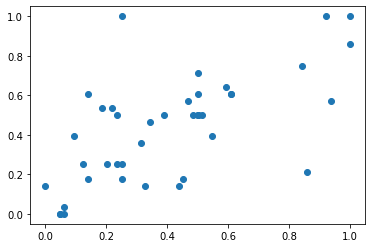

In [93]:
plt.scatter(aidt_score_matrix['aidt'], ait_score_matrix['ait'])

In [94]:
aidt_score_matrix['aidt'].corr(ait_score_matrix['ait'])

0.6556224184743832

In [95]:
scores = pd.concat([demo_data, dba_score_matrix, sdcc_score_matrix, ait_score_matrix, aidt_score_matrix, dbg_score_matrix], axis = 1)

In [96]:
scores.iloc[:,5].unique()

array(['Licenciatura', 'Escuela Secundaria/Título Universitario',
       'Ninguno', 'Maestría'], dtype=object)

In [97]:
gender_key = {'Hombre': 'Male', 'Mujer': 'Female'}

In [98]:
ethnic_key = {'Hispano / latino':'Hispanic/Latino ','Blanco':'White',  'Negro / afroamericano':'Black/African American'}

In [99]:
edu_key = {'Licenciatura':'Bachelor\'s Degree',
       'Maestría':'Master\'s Degree', 'Ninguno':'None', 'Escuela Secundaria/Título Universitario':'High School/College Degree'}

In [100]:
scores.iloc[:,3].replace(gender_key, inplace = True)
scores.iloc[:,4].replace(ethnic_key, inplace = True)
scores.iloc[:,5].replace(edu_key, inplace = True)

In [101]:
scores.to_csv('spn_data.csv', index = False)